In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import pickle

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


In [2]:
# load data
with open('../data/train_data.pkl', 'rb') as f:
    X_train, y_train = pickle.load(f)
with open('../data/validation_data.pkl', 'rb') as f:
    X_val, y_val = pickle.load(f)
with open('../data/test_data.pkl', 'rb') as f:
    X_test, y_test = pickle.load(f)

# Dummy mean model

In [3]:
performances = []

In [4]:
# Add performance of dummy mean model
mean_value = y_train.mean()
model_name = 'mean'
for y,nsplit in zip([y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    performance = np.sqrt(mean_squared_error(y, 
                                             [mean_value]*y.shape[0]))
    r2 = r2_score(y, [mean_value]*y.shape[0])
    performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

# Linear model

In [5]:
# Load and fit model
reg = LinearRegression().fit(X_train, y_train)
# Zip data and labels
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']): 
    # get predictions                
    preds = reg.predict(x)
    # Get r2 value
    r2 = r2_score(y, preds)
    # Get RMSE
    performance = np.sqrt(mean_squared_error(y, preds))
    # Append
    performances.append({'model': 'linear',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

# KNN model

In [6]:
for k in [5,10,20,30,100]: # Choosing number of neighbors
    # Load model
    knn = KNeighborsRegressor(n_neighbors=k)
    # Fit model
    knn.fit(X_train, y_train)
    # Zip data and labels
    for x,y,nsplit in zip([X_train, X_val, X_test],
                        [y_train, y_val, y_test],
                        ['train', 'val', 'test']):
        # Make predictions                
        preds = knn.predict(x)
        # Get r2 score
        r2 = r2_score(y, preds)
        # get rmse
        performance = np.sqrt(mean_squared_error(y, preds))
        # Append
        performances.append({'model': f'KNN-{k}',
                            'split': nsplit,
                            'rmse': performance.round(4),
                            'r2': r2.round(4)})

# Plotting

In [7]:
#Turn into pddf
perf_df = pd.DataFrame(performances)

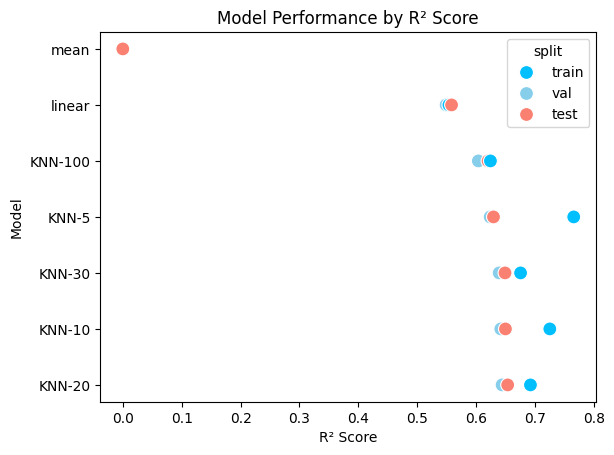

In [8]:
# Make scatterplot of r2
sns.scatterplot(data=perf_df.sort_values(by='r2', ascending=True), 
                     y='model', 
                     x='r2', 
                     marker='o',   # Circle markers
                     s=100,        # Size of the markers
                     hue='split',  # Color by split
                     palette={'train': 'deepskyblue', 'val': 'skyblue', 'test': 'salmon'})  # Custom color palette

# Adding plot title
plt.title('Model Performance by R² Score')

# Adding x and y axis labels
plt.xlabel('R² Score')
plt.ylabel('Model')
# Save plot
plt.savefig(('../plots/base_models_R2.png'))
# Display the plot
plt.show()

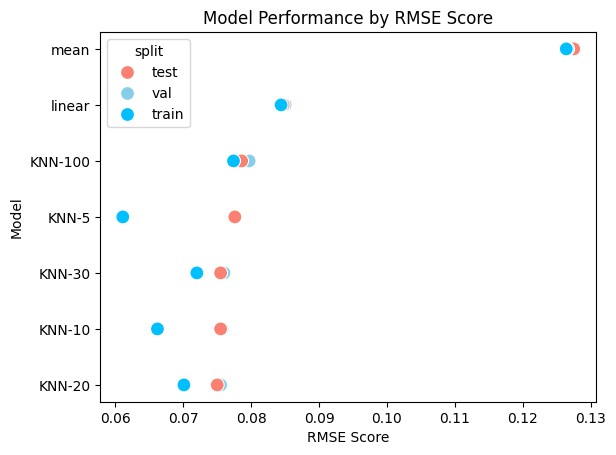

In [9]:
# Make scatterplot of rmse
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                     y='model', 
                     x='rmse', 
                     marker='o',   # Circle markers
                     s=100,        # Size of the markers
                     hue='split',  # Color by split
                     palette={'train': 'deepskyblue', 'val': 'skyblue', 'test': 'salmon'})  # Custom color palette

# Adding plot title
plt.title('Model Performance by RMSE Score')

# Adding x and y axis labels
plt.xlabel('RMSE Score')
plt.ylabel('Model')
# Save plot
plt.savefig(('../plots/base_models_RMSE.png'))
# Display the plot
plt.show()

# Predictions of best model (KNN-20)

In [10]:
# Look at predictions for best model (KNN-20)
best_model = KNeighborsRegressor(n_neighbors=20)
best_model.fit(X_train, y_train)
best_preds = best_model.predict(X_val)
absolute_error = np.abs(best_preds - y_val)


In [11]:
best_preds=best_preds.flatten()
y_val=y_val.flatten()

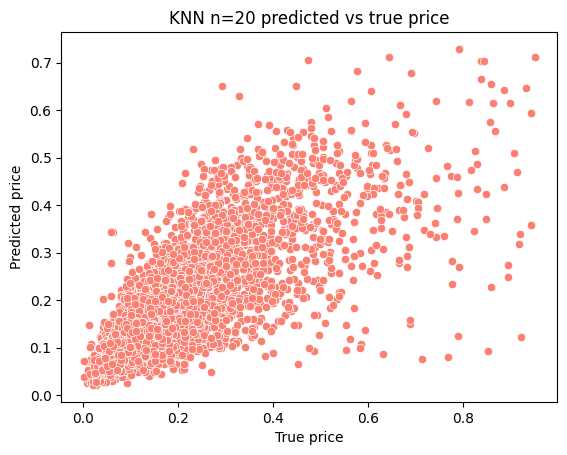

In [12]:
# Make scatterplot of prd vs true values
sns.scatterplot(x=y_val, y=best_preds, color='salmon')
plt.title('KNN n=20 predicted vs true price')
plt.xlabel('True price')
plt.ylabel('Predicted price')
# Save plot
plt.savefig(('../plots/KNN20_prdicted_true.png'))
plt.show()

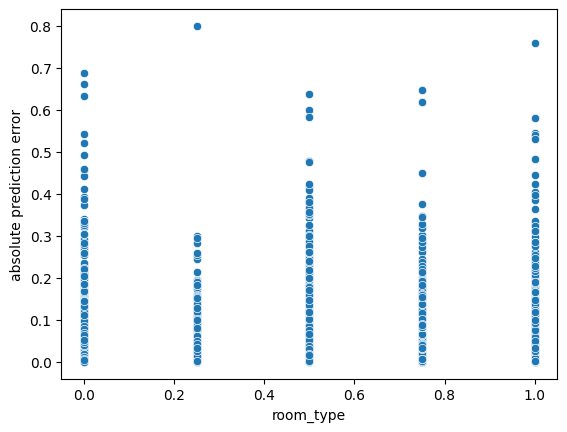

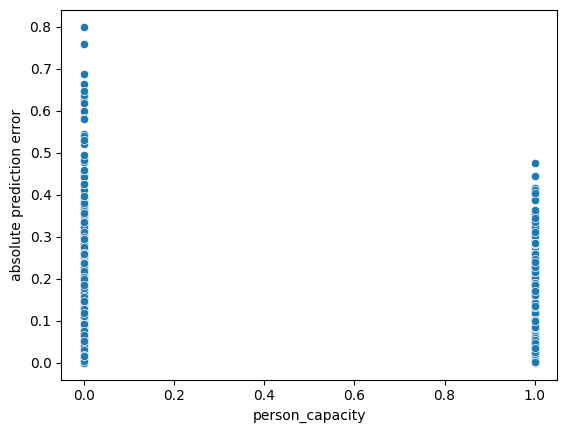

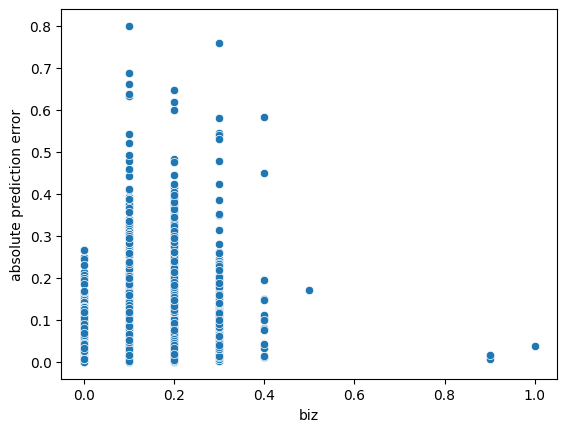

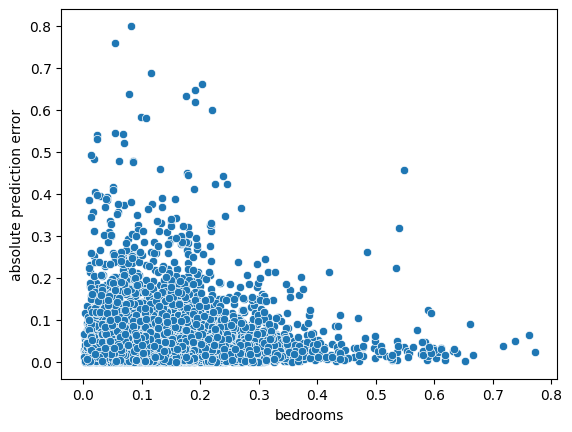

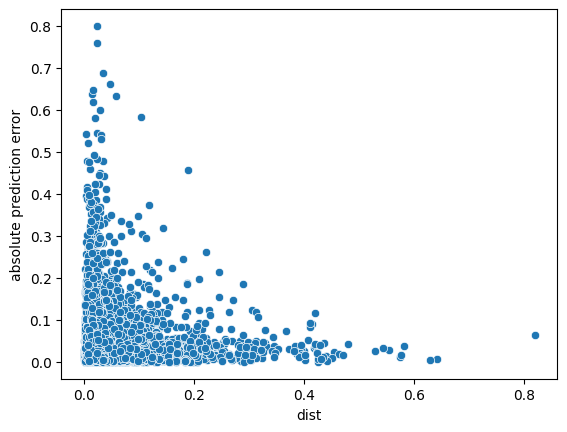

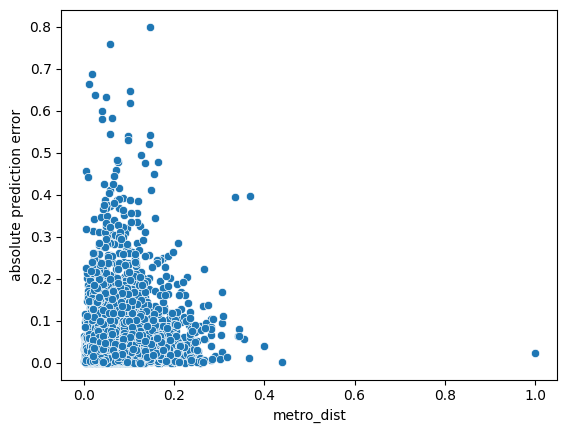

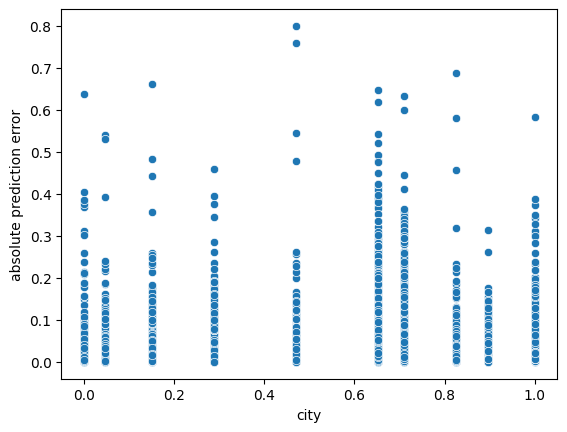

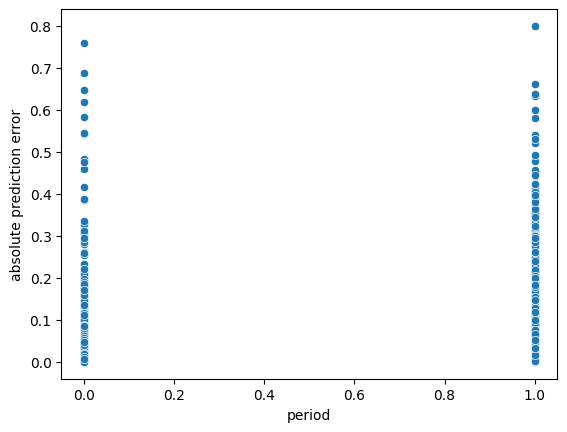

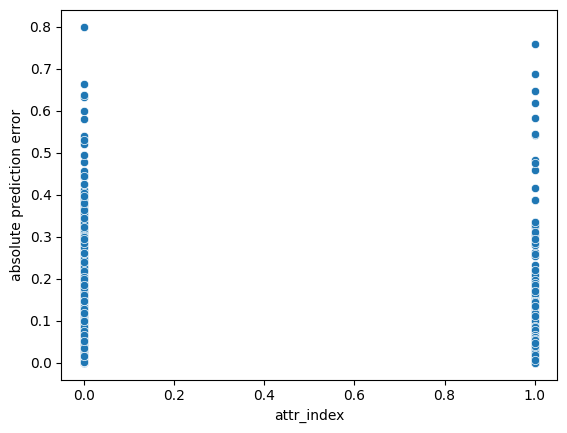

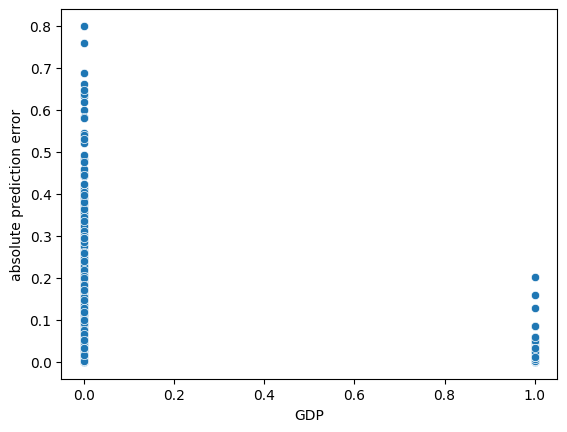

In [15]:
absolute_error = np.abs(best_preds - y_val)
column_names = ['room_type', 'person_capacity', 'biz', 'bedrooms', 'dist', 'metro_dist', 'city', 'period', 'attr_index', 'GDP']
for i in range(10):
    sns.scatterplot(x=X_val[:,i], y=absolute_error)
    plt.xlabel(column_names[i])
    plt.ylabel('absolute prediction error')
    plt.show()